In [1]:
import os
from PIL import Image
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D

In [2]:
path = "dataset"

In [3]:
images = []
labels = []

In [4]:
def load_images_from_folder(path, image_size):
    for label in os.listdir(path):
        label_path = os.path.join(path, label)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                img_path = os.path.join(label_path, filename)
                img = Image.open(img_path)
                img = img.resize(image_size)
                img = np.array(img)
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

In [5]:
image_size = (150,150)

In [6]:
X, y = load_images_from_folder(path, image_size)

In [7]:
X = X / 255.0

In [8]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [9]:
y = to_categorical(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

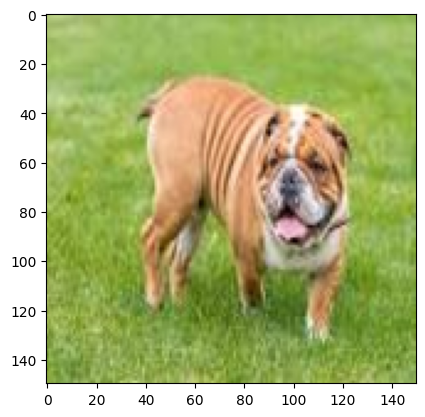

In [11]:
plt.imshow(X_train[10])

## Layers

In [12]:
model3 = Sequential()

In [13]:
model3.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(150, 150, 3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(len(labelencoder.classes_), activation='softmax'))

C:\Users\L E N O V O\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,183,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,204,554 (4.60 MB)

 Trainable params: 1,204,554 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
history3 = model3.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.1441 - loss: 2.2700 - val_accuracy: 0.2990 - val_loss: 1.8098
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5282 - loss: 1.3821 - val_accuracy: 0.6753 - val_loss: 1.0221
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.8474 - loss: 0.5508 - val_accuracy: 0.8969 - val_loss: 0.5150
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.9592 - loss: 0.1626 - val_accuracy: 0.9278 - val_loss: 0.2798
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.9983 - loss: 0.0290 - val_accuracy: 0.9897 - val_loss: 0.1238


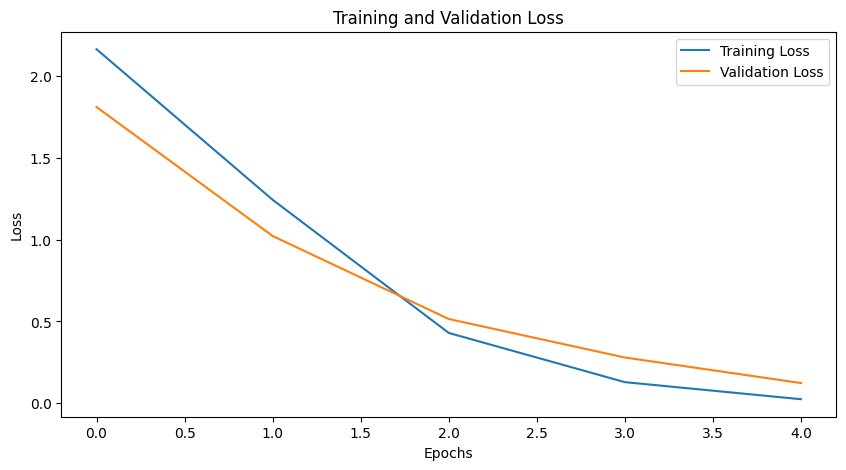

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Activation Functions

In [18]:
model1 = Sequential()

In [19]:
model1.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='tanh', input_shape=(150, 150, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='tanh'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(len(labelencoder.classes_), activation='softmax'))

In [20]:
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
history1 = model1.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.1327 - loss: 5.5085 - val_accuracy: 0.1186 - val_loss: 2.6853
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step - accuracy: 0.2517 - loss: 2.1476 - val_accuracy: 0.4330 - val_loss: 1.6326
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.6166 - loss: 1.3345 - val_accuracy: 0.5619 - val_loss: 1.2677
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.8270 - loss: 0.7905 - val_accuracy: 0.9330 - val_loss: 0.6007
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - accuracy: 0.9731 - loss: 0.3297 - val_accuracy: 0.9433 - val_loss: 0.3058


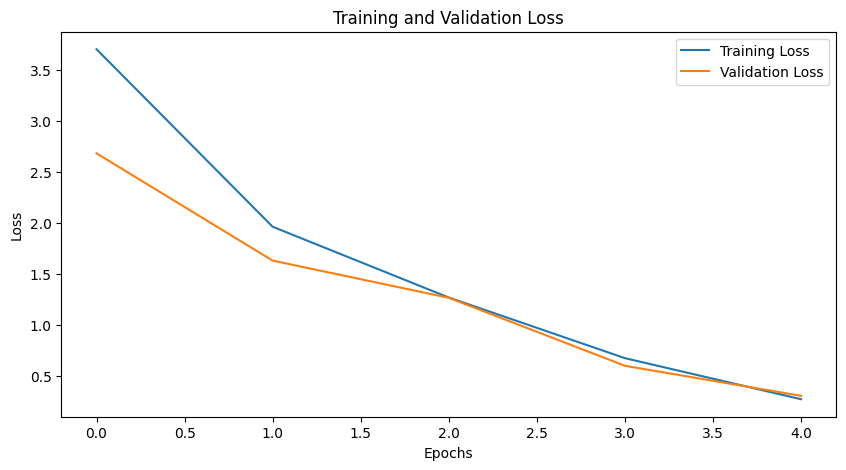

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Changing Pooling types and setting padding 'same'

In [23]:
model2 = Sequential()

model2.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model2.add(AveragePooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model2.add(AveragePooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(len(labelencoder.classes_), activation='softmax'))

In [24]:
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
history2 = model2.fit(X_train, y_train, epochs = 5, batch_size = 32, validation_data = (X_test, y_test))

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.1060 - loss: 3.2673 - val_accuracy: 0.3196 - val_loss: 2.1751
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.3680 - loss: 2.0194 - val_accuracy: 0.5722 - val_loss: 1.5893
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.7332 - loss: 1.1048 - val_accuracy: 0.8557 - val_loss: 0.6804
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.9526 - loss: 0.3289 - val_accuracy: 0.9381 - val_loss: 0.3579
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.9758 - loss: 0.1441 - val_accuracy: 0.9897 - val_loss: 0.1147


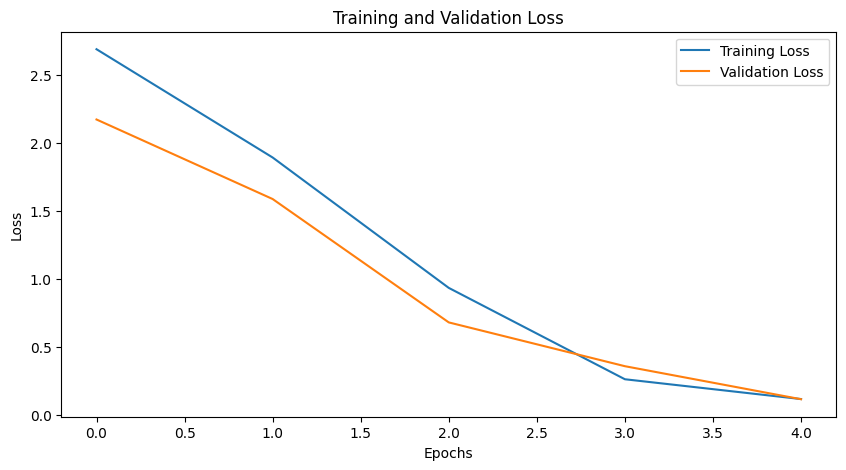

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()